Filtros de Suavização
======

Elabore um notebook explicando o funcionamento das funções de filtragem de ruído e demonstre o uso da função cv.filter2D com diferentes kernels de convolução.

Tome por base o tutorial existente no site https://docs.opencv.org/4.0.0/d4/d13/tutorial_py_filtering.html

Analise os resultados.

Faça o mesmo com as funções Gaussian Blur e Median Blur.

Importação das bibliotecas:

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Carregamento da imagem:

In [3]:
imgBGR = cv.imread('onca.jpg',1)
img = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)

Função `cv2.filter2D`
=============

Como nos sinais unidimensionais, as imagens também podem ser filtradas com vários filtros passa-baixo (LPF), filtros passa-alto (HPF), etc. O LPF ajuda na remoção de ruído, desfocagem de imagens, etc. Os filtros HPF ajudam a encontrar arestas nas imagens.

A função `cv2.filter2D` faz a convolução da imagem com um filtro kernel.

O exemplo abaixo é aplicado a convolção com o filtro **Kernel Average** que é um LPF, ou seja, elimina as frequência altas e suaviza a imagem. O resultado é comparado com função `cv2.blur()`.

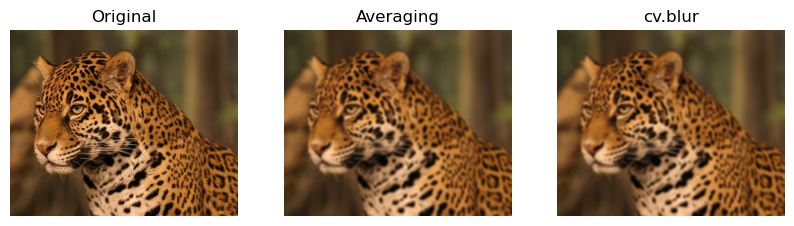

In [4]:
kernelAveraging = (1/25) * np.ones([5,5])
dst = cv.filter2D(img,-1,kernelAveraging)

blur = cv.blur(img,(5,5))

plt.figure(figsize=(10,3))
plt.subplot(131), plt.imshow(img), plt.title('Original'), plt.axis("off")
plt.subplot(132), plt.imshow(dst), plt.title('Averaging'), plt.axis("off")
plt.subplot(133), plt.imshow(blur), plt.title('cv.blur'),plt.axis("off")
plt.show()

Função `cv2.GaussianBlur()`
=========

A função `cv2.GaussianBlur()` aplica a convolução da imagem com o filtro **Kernel Gaussian**.

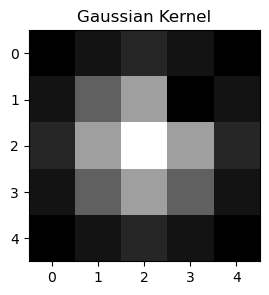

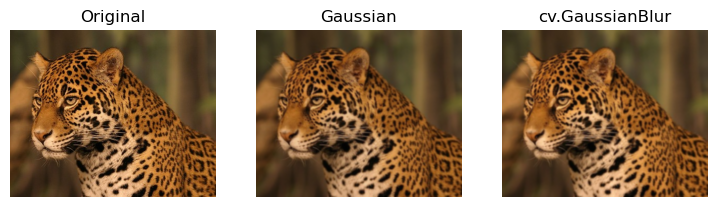

In [5]:
kernelGaussian = (1/273) * np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 1, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
])

plt.figure(figsize=(3, 3))
plt.imshow(kernelGaussian, 'gray'), plt.title("Gaussian Kernel")
plt.show()

dst = cv.filter2D(img,-1,kernelGaussian)

cvGaussian = cv.GaussianBlur(img,(5,5),0)

plt.figure(figsize=(9, 3))
plt.subplot(131), plt.imshow(img), plt.title('Original'), plt.axis("off")
plt.subplot(132), plt.imshow(dst), plt.title('Gaussian'), plt.xticks([]), plt.axis("off")
plt.subplot(133), plt.imshow(cvGaussian), plt.title('cv.GaussianBlur'), plt.axis("off")
plt.show()

Função `cv2.medianBlur()`
======

A função `cv2.medianBlur()` é aplicado a convolução na imagem com o filtro **Kernel Median**. Essa operação faz a mediana nos valores do pixels nas regiões da imagem.

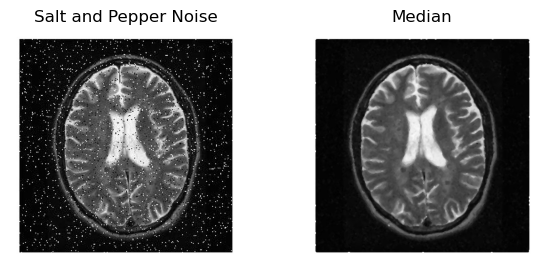

In [7]:
noise = cv.imread('noise.jpeg')

median = cv.medianBlur(noise,5)

plt.figure(figsize=(7, 3))
plt.subplot(121), plt.imshow(noise), plt.title('Salt and Pepper Noise'), plt.axis("off")
plt.subplot(122), plt.imshow(median), plt.title('Median'), plt.axis("off")
plt.show()
    